<h1 align="center">Partículas cuánticas con espín 1/2 sometidas a un campo magnético externo H</h1>
<div align="right">David A. Miranda, PhD<br>2021</div>


## 1. Importar librerías

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import constants as ct
from scipy.special import gamma as Gamma
import itertools as it

## 2. Planteamiento del problema

Sea un sistema aislado formado por $N$ partículas cuánticas con espñin $s=1/2$ cuya interacción entre si puede despreciarse, es decir, el sistema se puede modelar como un gas ideal.  Se asume que cada partícula tiene un momento magnético $\vec{\mu}$ cuya magnitud está dada por, 

$$\mu = g \frac{q_e}{2 m_e}S$$

Donde $g_s = 2.00231930436$, $q_e$, la carga del electrón, $m_e$, la masa del electrón y $S=\hbar/2$, el momento espín.

Al aplicar un campo magnético externo $\vec{B}$, una cierta partícula cuánticas se pueden alinear con el campo magnético paralela o antiparalela a este.  Si se asume que $n_1$ partículas se alinean con el campo y el resto, $n_2 = N - n_1$, en sentido contrario, la energía del sistema estará dada por $ E = - (n_1 - n_2) \mu B $.

Entonces, el número de estados con energía entre $E$ y $E + \delta E$ está dado por.

$$\Omega(E) = \frac{N!}{\left(\frac{N}{2}-\frac{E}{2\mu B} \right)! \left( \frac{N}{2} + \frac{E}{2\mu B} \right)!} \frac{\delta E}{2\mu B}$$

[Ver explicación](https://youtu.be/yFWxy3Rlhw0)



## 3. Definiciones y métodos

In [2]:
N = np.r_[10, 100]
B = np.r_[1, 2] # T
q = 2.00231930436
S = ct.hbar/2 # J s
mu = q * ct.e * S / (2 * ct.m_e)

In [3]:
def energy(N, B):
    Emax = mu * B * N
    return np.linspace(-Emax, Emax, 1000)

In [4]:
def omega(E, N, B, delta_E=0):
    if delta_E == 0:
        delta_E = min(np.diff(E))
    N_ = E/(mu*B)
    n1 = Gamma( 1 + N )
    d1 = Gamma( 1 + N/2 - N_/2)
    d2 = Gamma( 1 + N/2 + N_/2)
    return delta_E, n1 * delta_E / (2 * mu * B * d1 * d2)

## 4. Efecto del campo magnético $B$ y el número de partículas $N$ en el número de estados $\Omega(E)$
### 4.1. Variación del campo magnético $B$ para un cierto número de partículas $N$

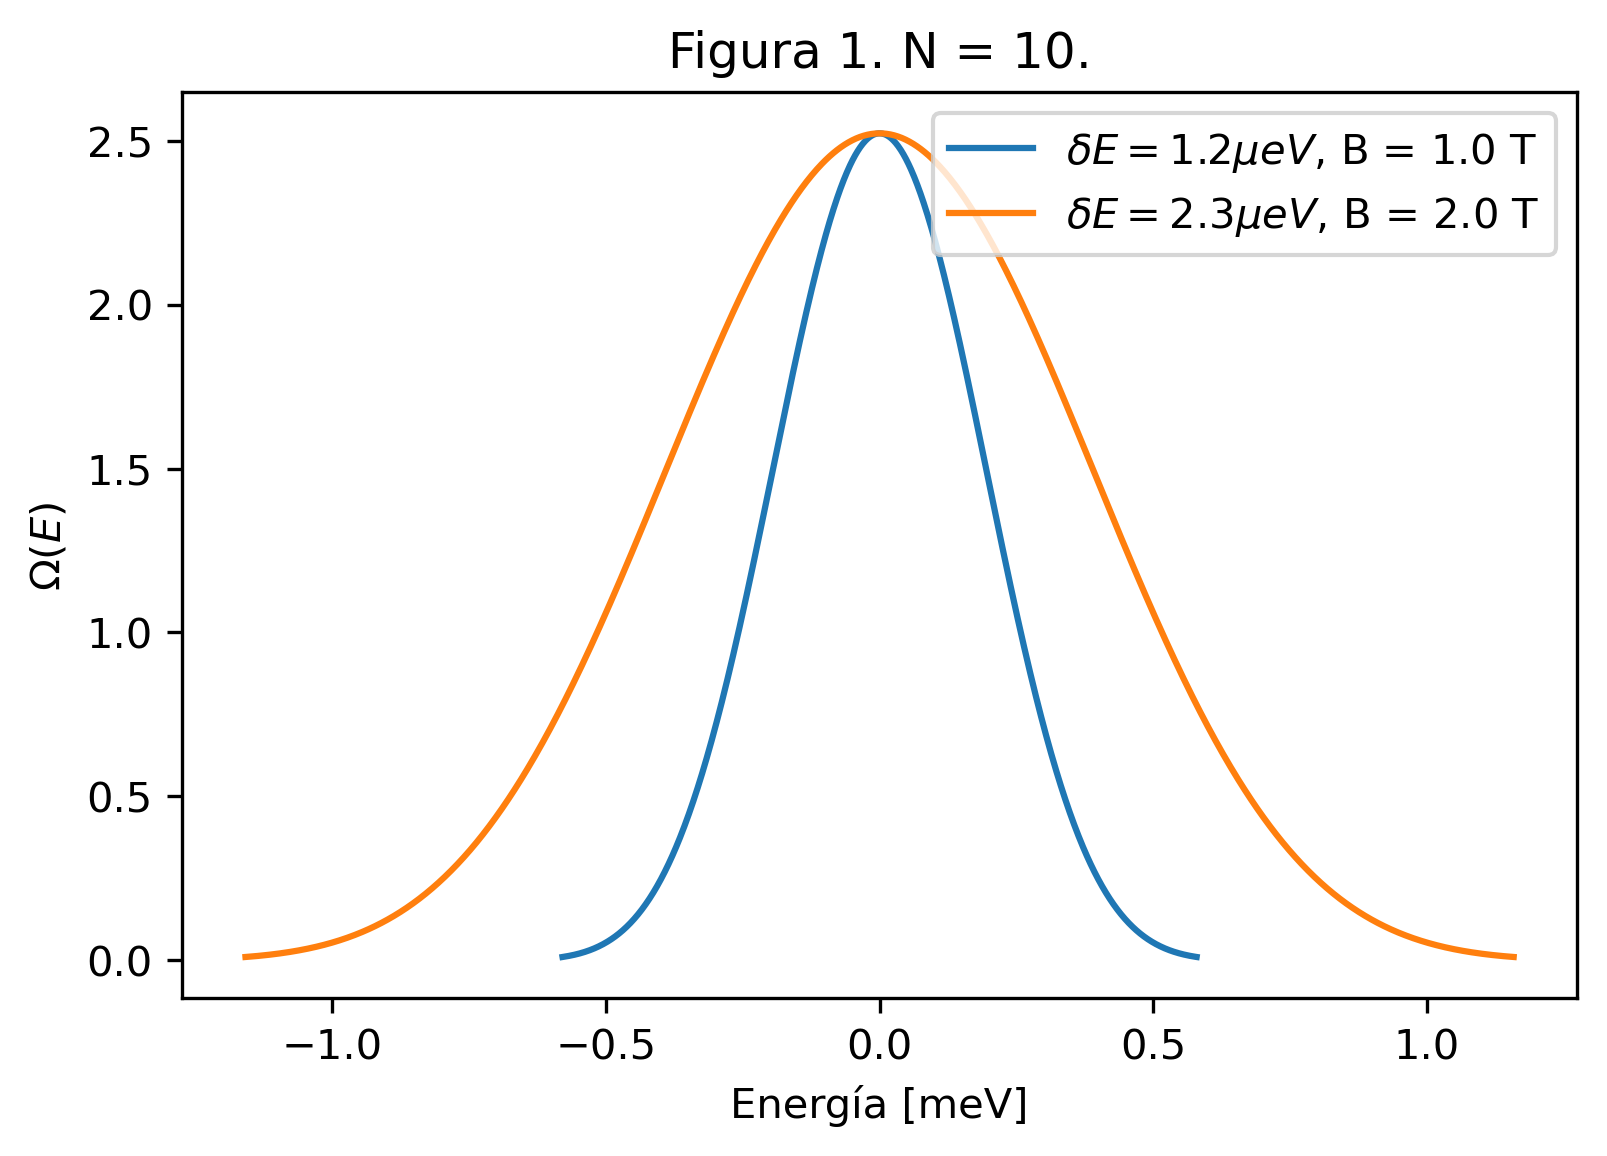

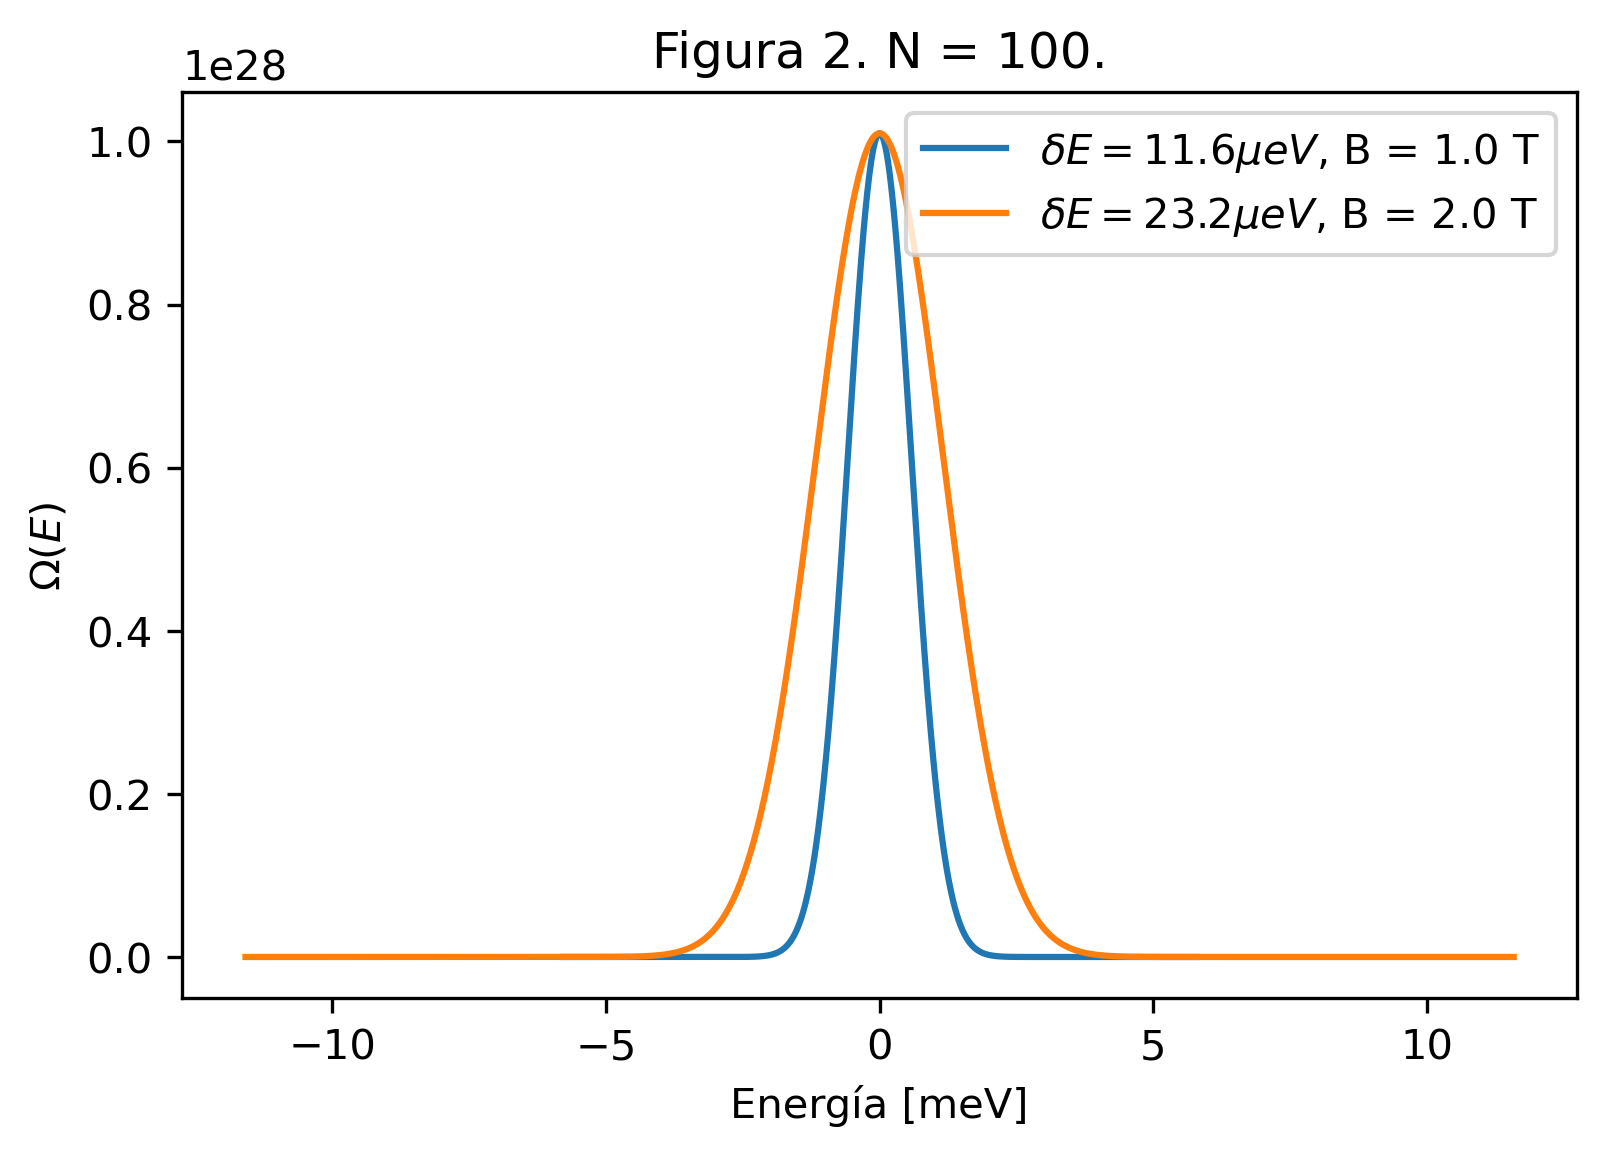

In [5]:
fig = {}; idx=0
for n, b in it.product(N, B):
    E = energy(n, b)
    delta_E, Omega = omega(E, n, b)
    w = 1 / ct.e
    if not n in fig.keys():
        idx += 1
        fig[n] = idx
    plt.figure(fig[n], dpi=300)
    plt.title('Figura %d. N = %d.' % (fig[n], n))
    plt.plot(1e3 * w * E, Omega, label=r'$\delta E = %0.1f \mu eV$, B = %0.1f T' % (1e6*delta_E/ct.e, b))
    plt.xlabel('Energía [meV]')
    plt.ylabel(r'$\Omega(E)$')
for i in range(idx):
    plt.figure(i+1)
    _ = plt.legend()

### 4.2. Variación del número de partículas $N$ para un cierto valor del campo magnético $B$

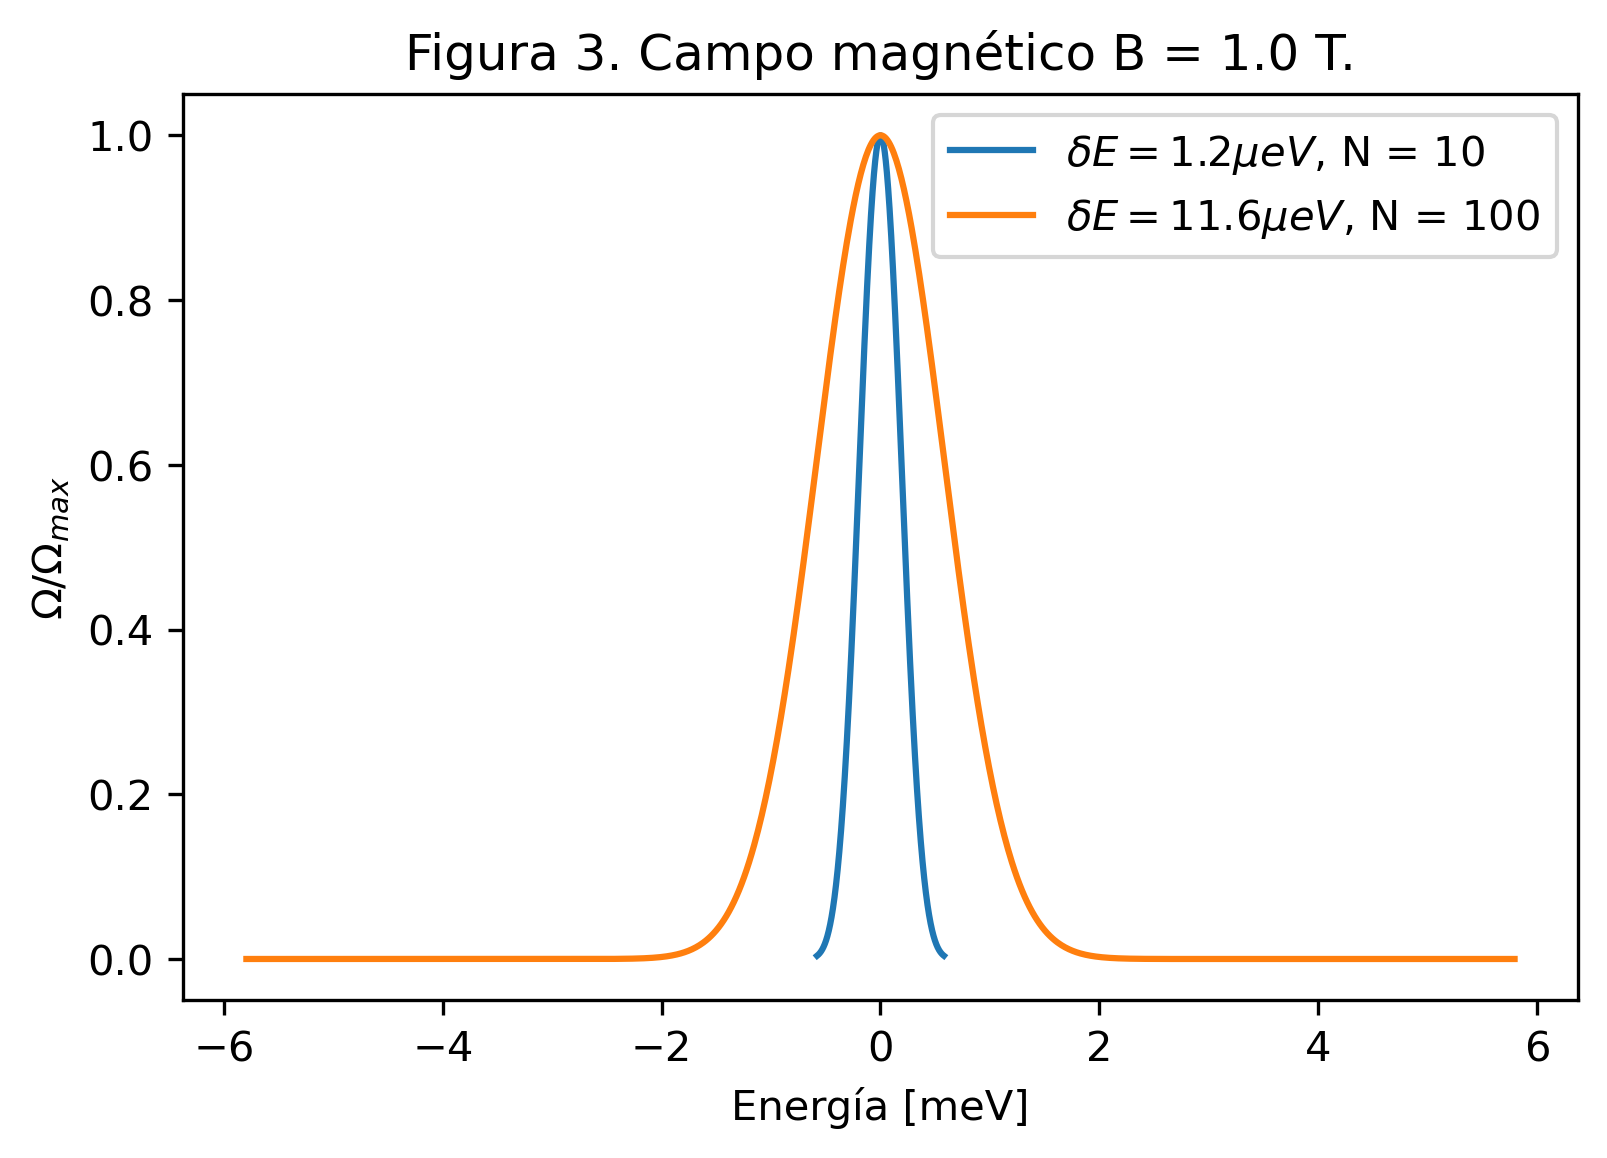

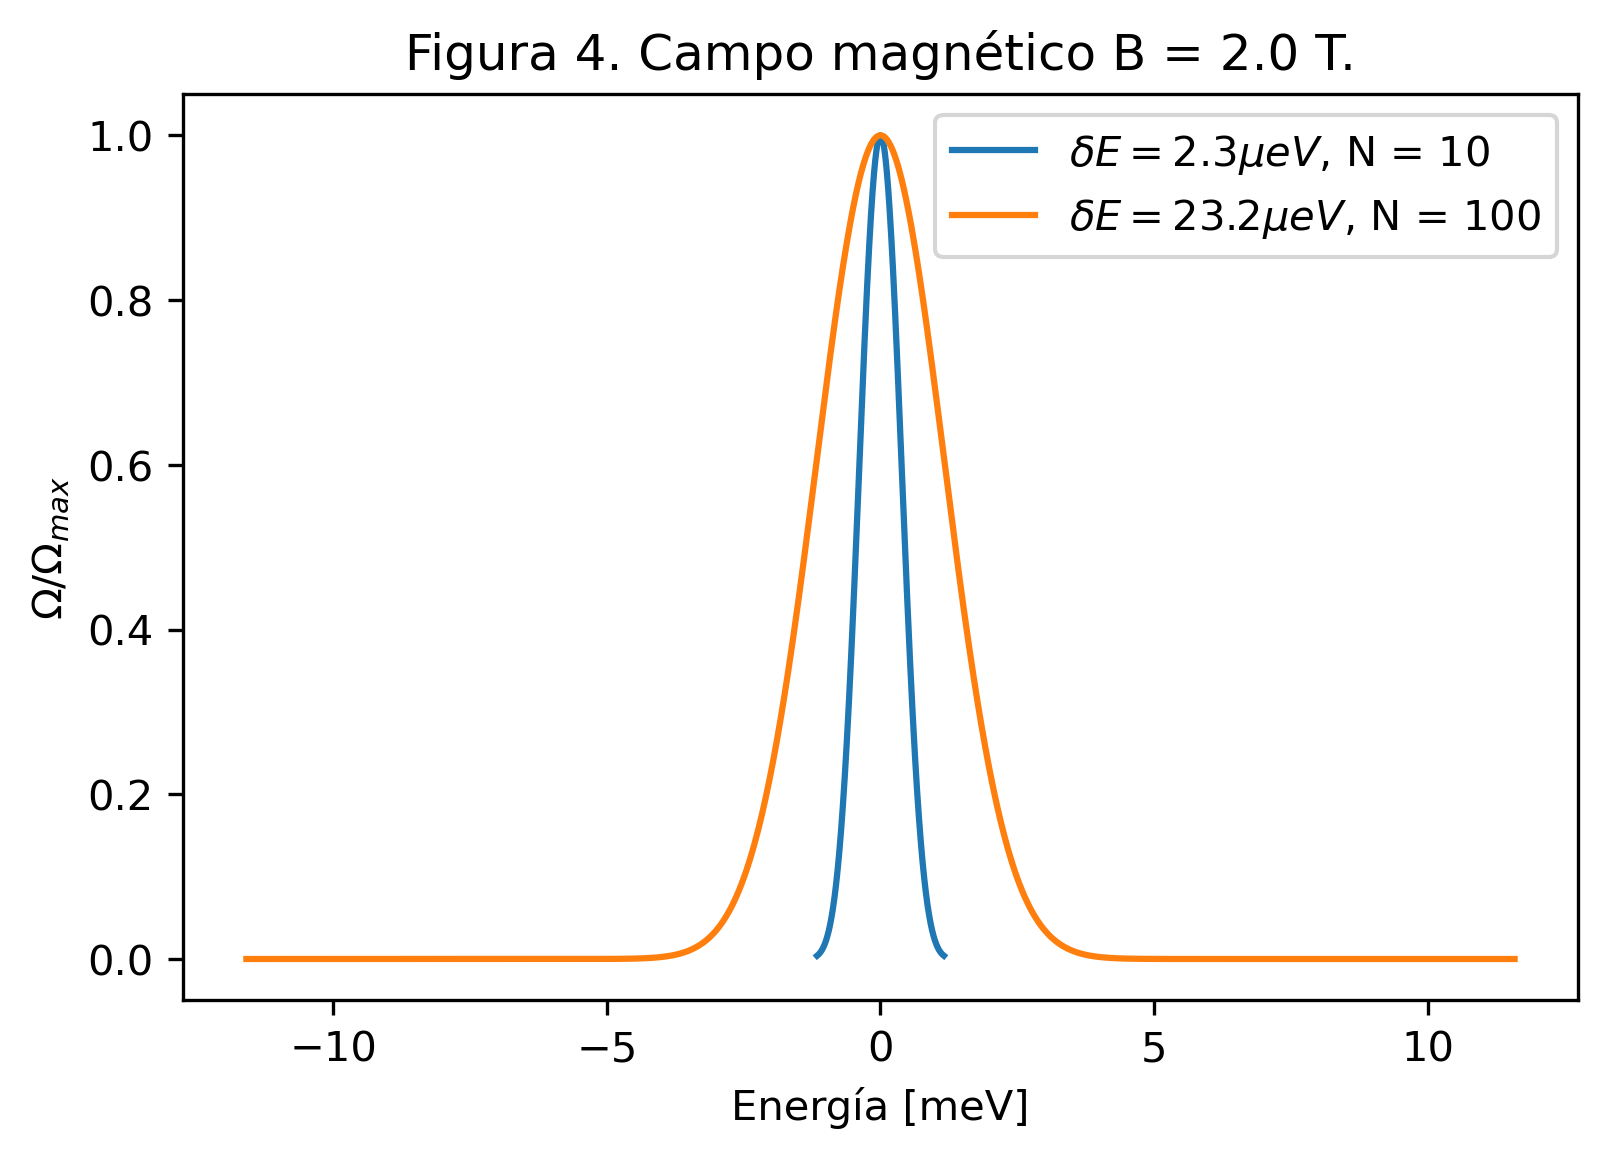

In [6]:
fig = {}; idx2 = 0
for n, b in it.product(N, B):
    E = energy(n, b)
    delta_E, Omega = omega(E, n, b)
    w = 1 / ct.e
    if not b in fig.keys():
        idx2 += 1
        fig[b] = idx2
    plt.figure(fig[b], dpi=300)
    plt.title('Figura %d. Campo magnético B = %0.1f T.' % (fig[b]+idx, b))
    plt.plot(1e3*w * E, Omega/max(Omega), label=r'$\delta E = %0.1f \mu eV$, N = %d' % (1e6*delta_E/ct.e, n))
    plt.xlabel('Energía [meV]')
    plt.ylabel(r'$\Omega/\Omega_{max}$')
for i in range(idx2):
    plt.figure(i+1)
    _ = plt.legend()

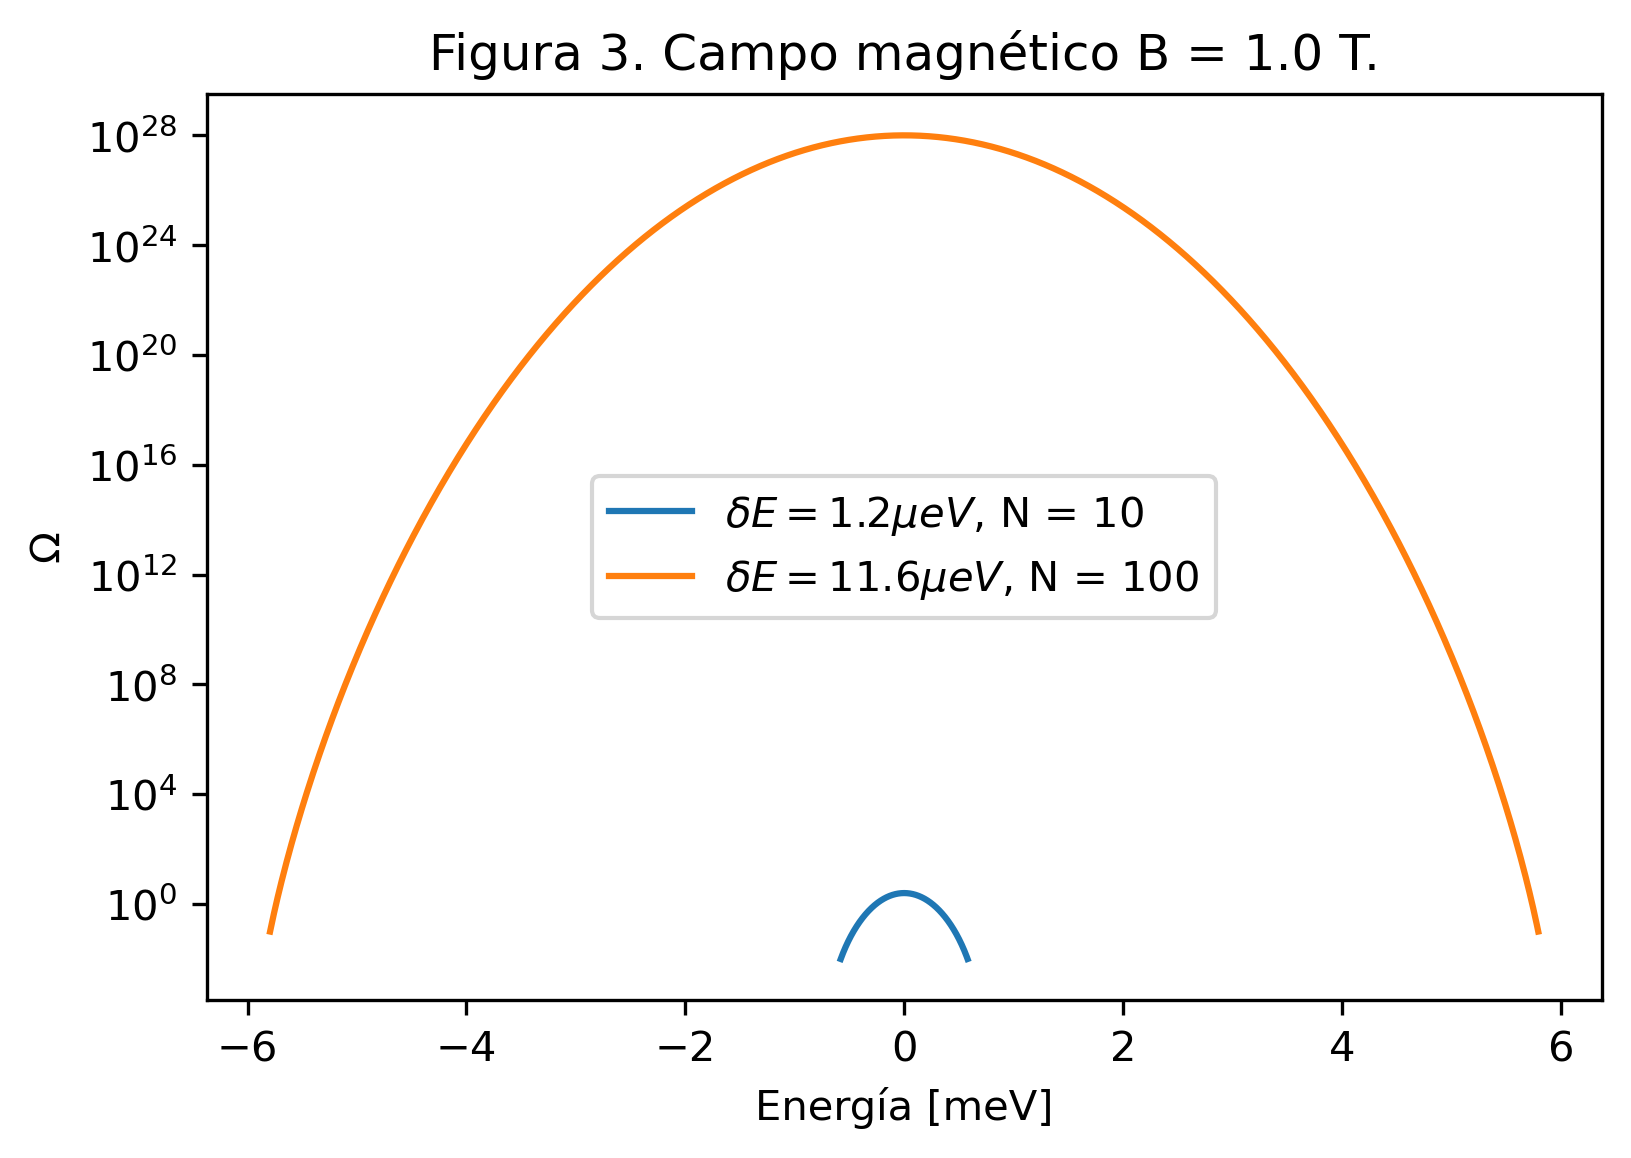

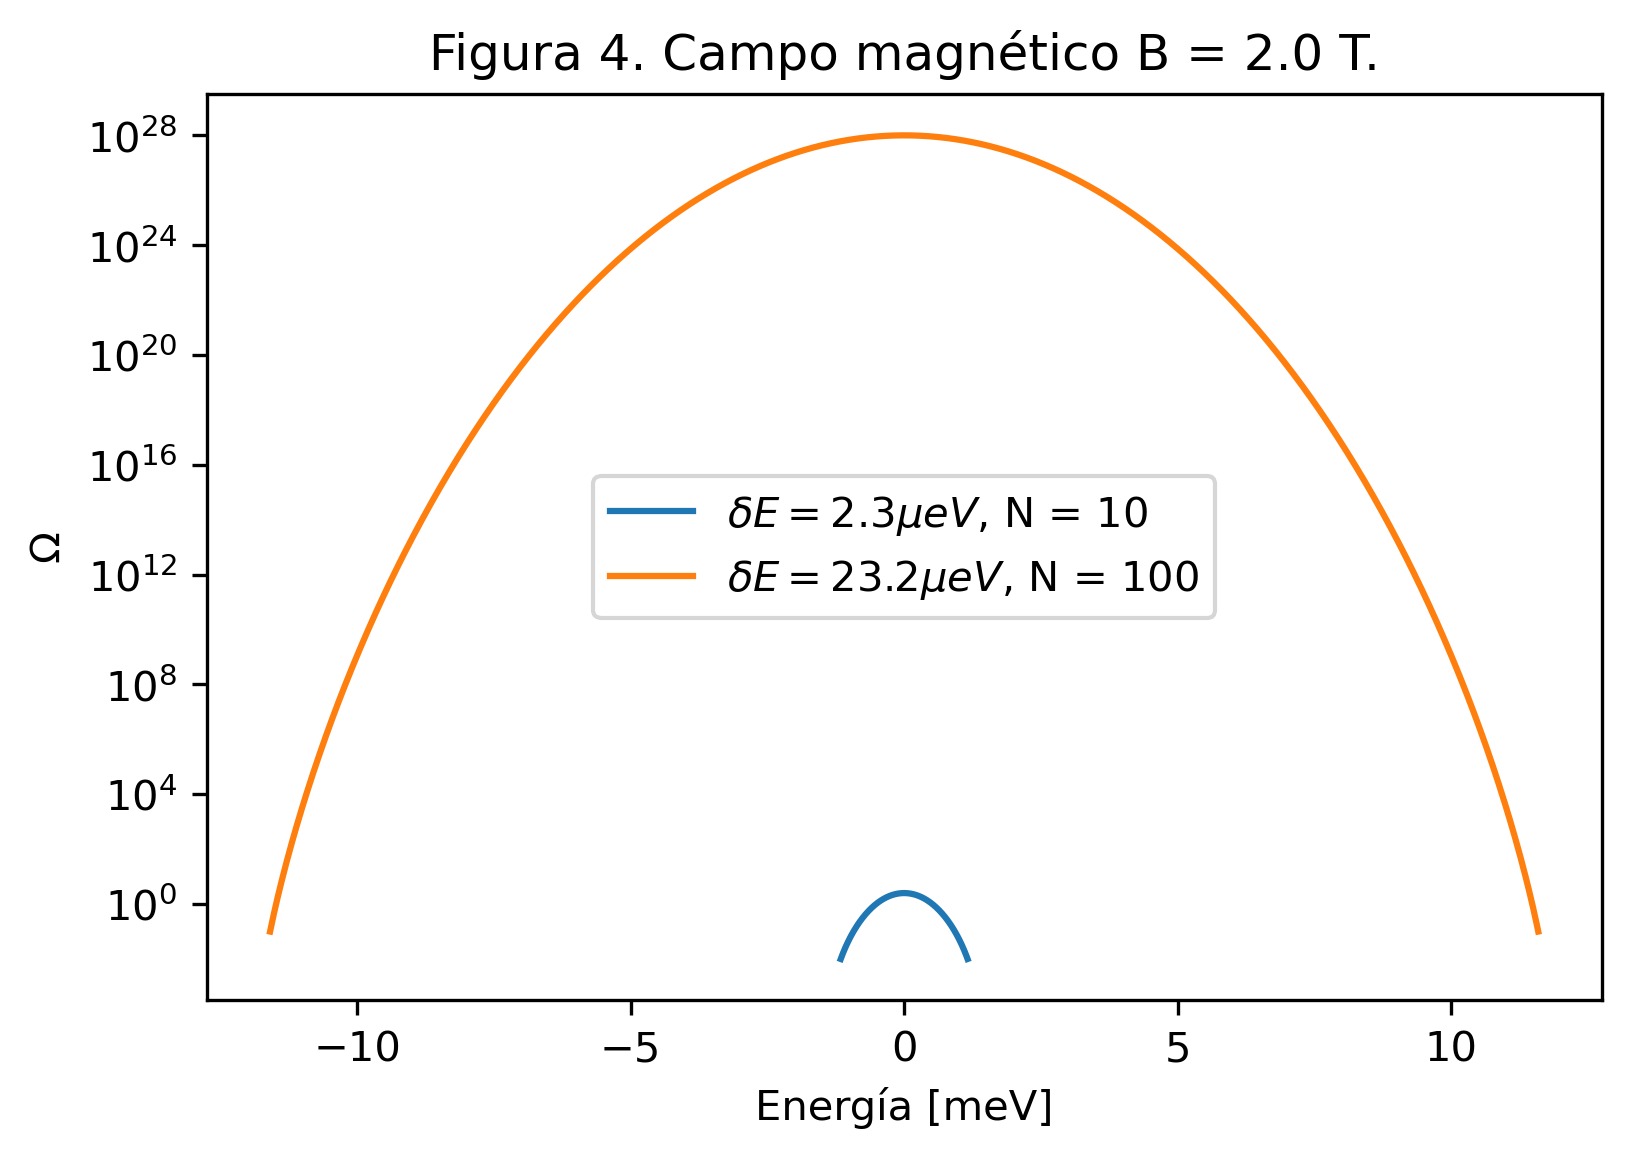

In [7]:
fig = {}; idx2 = 0
for n, b in it.product(N, B):
    E = energy(n, b)
    delta_E, Omega = omega(E, n, b)
    w = 1 / ct.e
    if not b in fig.keys():
        idx2 += 1
        fig[b] = idx2
    plt.figure(fig[b], dpi=300)
    plt.title('Figura %d. Campo magnético B = %0.1f T.' % (fig[b]+idx, b))
    plt.semilogy(1e3*w * E, Omega, label=r'$\delta E = %0.1f \mu eV$, N = %d' % (1e6*delta_E/ct.e, n))
    plt.xlabel('Energía [meV]')
    plt.ylabel(r'$\Omega$')
for i in range(idx2):
    plt.figure(i+1)
    _ = plt.legend()

## 5. Preguntas de autoexplicación

### 5.1. Primer bloque de preguntas

5.1.1. ¿Cómo se calculan los factoriales que aparecen en el número de estados $\Omega(E)$?

5.1.2. ¿Cuál es la diferencia entre $E$ y $\delta E$?

5.1.3. Deduzca la expresión para el número de estados $\Omega(E)$ con energías entre $E$ y $E + \delta E$.

### 5.2. Segundo bloque de preguntas

5.2.1. En el ítem 4.2, ¿qué es $\Omega_{max}$?

5.2.2. En las figuras del ítem 4.2, ¿cuál es el propósito de graficar $\Omega / \Omega_{max}$ en vez de solo graficar $\Omega(E)$?

5.2.3. Utilice las figuras mostradas en el *Worked Example* para describir el efecto del campo magnético $B$ y el número de partículas $N$ sobre el número de estados $\Omega(E)$ con energías entre $E$ y $E + \delta E$.

### 5.3. Tercer bloque de preguntas

Utilice la [aproximación de Stirling](https://colab.research.google.com/github/davidalejandromiranda/StatisticalPhysics/blob/master/notebooks/es_AproximacionStirling.ipynb) y grafique $ln(\Omega)$ para $N \ggg 100$. ¿Observa el mismo comportamiento que para $N \leq 100$?

End!